In [1]:
# Imports
!pip install seaborn wordcloud
import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 215 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 364 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 6.2 MB/s eta 0:00:01


In [2]:
train=pd.read_csv('data/train.csv',encoding='latin')

In [3]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [4]:
train.dropna(inplace=True)
unique_tokens=train['tweet'].str.split()
len(unique_tokens)


7273

In [5]:
all_sentiments='\n'.join(train['tweet'])

In [6]:
all_sentiments[0:50]

'#sxswnui #sxsw #apple defining language of touch w'

In [7]:
#unique tokens
tk=TreebankWordTokenizer()
unique_len=len(set(tk.tokenize(all_sentiments)))

In [8]:
print('Unique unprocessed tokens',unique_len)

Unique unprocessed tokens 12994


In [9]:
#unique lower case tokens
unique_lowecase=[i.lower() for i in tk.tokenize(all_sentiments)]
unique_lower_len=len(set(unique_lowecase) )
print(unique_lower_len)

10745


In [10]:
ps=PorterStemmer()

In [11]:
#unique lowercase stem tokens
unique_lc_stems=[ps.stem(t) for t in unique_lowecase ]
unique_lc_stem_count=len(set(unique_lc_stems))
print('unique lower case stem tokens are',unique_lc_stem_count)

unique lower case stem tokens are 9022


In [12]:
# Load stop words
nltk.download('stopwords')
stw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Unique lower cased stemmed w/o stop wordstokens

unique_lc_stem_wo_stpwrds = [t for t in unique_lc_stems if t not in stw]
unique_lc_stem_wo_stw_count = len(set(unique_lc_stem_wo_stpwrds))

print(f'Unique lower case stemmed tokens without stop words - {unique_lc_stem_wo_stw_count}')

Unique lower case stemmed tokens without stop words - 8916


In [14]:
# Create a word cloud

wc = WordCloud(stopwords=stw, background_color='white', max_words=500).generate(all_sentiments.lower())

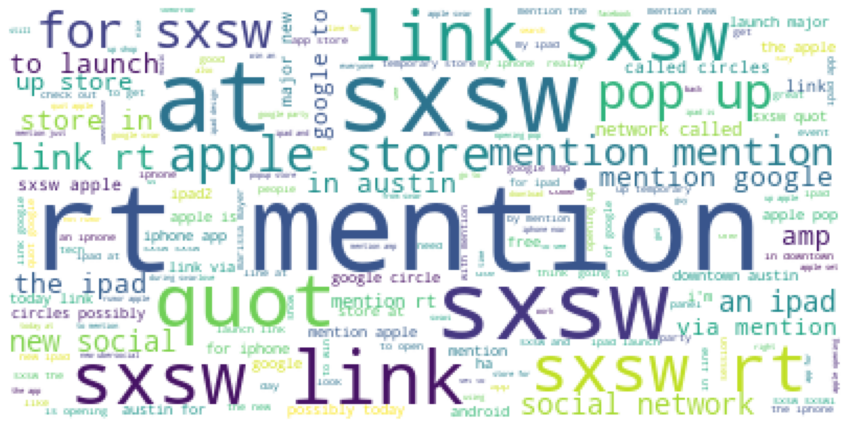

In [15]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

**Sentiment Analysis**

In [16]:

# Sentiment Analysis imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

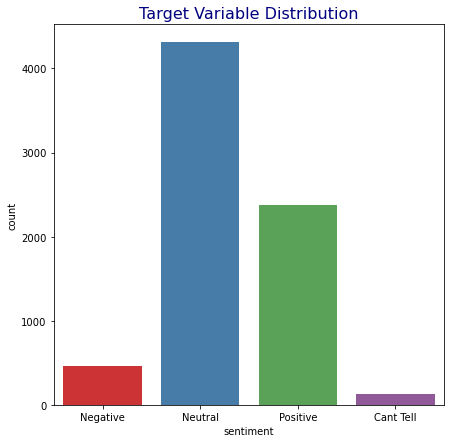

In [17]:
# Sentiment categories

plt.figure(figsize=(7, 7))
#label={0:'Negative',1:'Neutral',2:'Positive',3:'Cant Tell'}
label=['Negative','Neutral','Positive','Cant Tell']
ax=sns.countplot(x=train['sentiment'],palette="Set1")
ax.set_xticklabels(label)
plt.title('Target Variable Distribution', fontsize=16, color='navy')
plt.show()

In [18]:
# Create X and Y

X = train['tweet']
y = train['sentiment']

In [19]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [20]:
cv = CountVectorizer()

In [21]:
# Creating count vectorizer from training data

X_train_vec = cv.fit_transform(X_train)

In [22]:
# Convert my test data into vectors for prediction

X_test_vec = cv.transform(X_test)

In [23]:
lr=LogisticRegression()
gb=GradientBoostingClassifier()
rf=RandomForestClassifier()

In [24]:
# Train the models and check CLF report

for model, name in zip([rf, lr, gb], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
              precision    recall  f1-score   support

           0       0.64      0.19      0.29        85
           1       0.69      0.89      0.77       882
           2       0.65      0.40      0.49       465
           3       0.00      0.00      0.00        23

    accuracy                           0.68      1455
   macro avg       0.49      0.37      0.39      1455
weighted avg       0.66      0.68      0.64      1455



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CLF report for Logistic Regression
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        85
           1       0.73      0.79      0.76       882
           2       0.57      0.54      0.56       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.42      0.39      0.40      1455
weighted avg       0.64      0.66      0.65      1455

CLF report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.79      0.13      0.22        85
           1       0.67      0.92      0.77       882
           2       0.65      0.31      0.42       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.53      0.34      0.36      1455
weighted avg       0.66      0.66      0.62      1455



***Cleaning with RE***

In [25]:
import re

In [26]:
tweet=train['tweet']


**List of unwanted items**

1. Hashtags (#)
2. Mentions (@)
3. Links (http://, https://)
4. Short link (t.co, bit.ly)
5. Numbers
6. Emojis
7. Emoticons
8. Punctuation

In [27]:
hastag_pat = r'#[0-9a-z_]+'
mentions_pat = r'\@[0-9a-z]+'
number_pat = r'\d+'
links_pat=r'https://[a-z]+\.[a-z]+|https://[a-z]+\.[a-z]+/[a-z]+|http://[a-z]+\.[a-z]+|http://[a-z]+\.[a-z]+/[a-z]+'
short_links_pat=r'[a-z]+\.[a-z]+'
emoji_pat = u'[\U00010000-\U0010ffff]'
emoticons = r'(?::|;|=)(?:-)?(?:\)|\(|D|P)'
#punctuation= r'\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@[\\]\^v_`\{\|\}\~'
punctuation= r'[a-z]+!|[a-z]+$[a-z]+'

In [28]:
def find_hashtags(tweet):
    return re.findall(hastag_pat, tweet, flags=re.I)

def find_mentions(tweet):
    return re.findall(mentions_pat, tweet, flags=re.I)

def find_number(tweet):
    return re.findall(number_pat, tweet, flags=re.I)
def find_links(tweet):
    return re.findall(links_pat, tweet, flags=re.I)
def find_short_links(tweet):
    return re.findall(short_links_pat, tweet, flags=re.I)
def find_emojis(tweet):
    return re.findall(emoji_pat, tweet, flags=re.UNICODE)
def find_emoticons(tweet):
    return re.findall(emoticons, tweet, flags=re.I)
def find_punctuations(tweet):
    return re.findall(punctuation, tweet, flags=re.I)

In [29]:
find_hashtags(all_sentiments)

['#sxswnui',
 '#sxsw',
 '#apple',
 '#GoogleDoodle',
 '#sxsw',
 '#SXSW',
 '#SXSW',
 '#Fuckit',
 '#Illmakeitwork',
 '#SXSW',
 '#technews',
 '#Tech_News',
 '#Apple',
 '#iPad_2',
 '#SXSW',
 '#tablets',
 '#tech',
 '#sxsw',
 '#ipad',
 '#UberSocial',
 '#iPhone',
 '#SXSW',
 '#Mashable',
 '#SXSW',
 '#FreeMusic',
 '#sxsw',
 '#SXSW',
 '#android',
 '#iphone',
 '#ipad',
 '#SXSW',
 '#elevate',
 '#sxsw',
 '#techenvy',
 '#SXSW',
 '#zazzlsxsw',
 '#Companies',
 '#SXSW',
 '#apps',
 '#features',
 '#hardware',
 '#ipad',
 '#iphone',
 '#sxsw',
 '#Calyp',
 '#Calyp',
 '#SXSW',
 '#sxsw',
 '#apple',
 '#iPad2',
 '#technology',
 '#iTunes',
 '#SXSW',
 '#sxsw',
 '#doubleloser',
 '#SXSW',
 '#sxsw',
 '#sxsw',
 '#sxsw',
 '#RISE_Austin',
 '#SXSW',
 '#circles',
 '#SXSW',
 '#Circles',
 '#sxsw',
 '#SXSW',
 '#sxsw',
 '#sxsw',
 '#startups',
 '#VC',
 '#movie',
 '#awesome',
 '#sxsw',
 '#Apple',
 '#SXSW',
 '#SXSW',
 '#sxsw',
 '#iPad',
 '#sxsw',
 '#iPad',
 '#sxsw',
 '#SXSW',
 '#sxsw',
 '#SXSW',
 '#DeferoMobile',
 '#ipad2',
 '#sx

In [30]:
find_mentions(all_sentiments)

['@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@LenaShaw',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@GapPacker',
 '@flavugm',
 '@MarcusRoss',
 '@JordanBell',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@mention',
 '@

In [31]:
find_links(all_sentiments)

['http://t.co',
 'http://itunes.apple',
 'http://t.co',
 'http://bit.ly',
 'http://bit.ly',
 'http://tinyurl.com',
 'http://bit.ly',
 'http://bit.ly',
 'https://market.android',
 'http://bit.ly',
 'https://market.android',
 'http://tumblr.com',
 'https://www.facebook',
 'http://t.co',
 'http://bit.ly',
 'https://www.facebook',
 'https://sites.google',
 'http://bit.ly']

In [32]:
find_emojis(all_sentiments)

[]

In [33]:
find_punctuations(all_sentiments)

['doodles!',
 'official!',
 'SXSW!',
 'case!',
 'there!',
 'b!',
 'dead!',
 'brooklyn!',
 'WOW!',
 'guys!',
 'sale!',
 'automatically!',
 'sweet!',
 'vid!',
 'Recco!',
 'now!',
 'Lazers!',
 'live!',
 'point!',
 'SXSW!',
 'supply!',
 'sitting!',
 'replacement!',
 'out!',
 'luck!',
 'SXSW!',
 'Android!',
 'YES!',
 'do!',
 'sxsw!',
 'search!',
 'action!',
 'booth!',
 'Google!',
 'Cool!',
 'dig!',
 'it!',
 'SXSW!',
 'saytextson!',
 'oh!',
 'yeah!',
 'Yay!',
 'hotpot!',
 'Nice!',
 'gadgetzilla!',
 'fun!',
 'scared!',
 'droid!',
 'Giveaway!',
 'cases!',
 'nice!',
 'grip!',
 'meetup!',
 'hook!',
 'geeky!',
 'it!',
 'POWER!',
 'wait!',
 'people!',
 'sxsw!',
 'lists!',
 'wow!',
 'sweet!',
 'suspense!',
 'madness!',
 'SXSW!',
 'too!',
 'tweet!',
 'show!',
 'NICE!',
 'insane!',
 'everyone!',
 'shortly!',
 'it!',
 'stuff!',
 'KILLING!',
 'time!',
 'Whoa!',
 'Wave!',
 'truth!',
 'Confirmed!',
 'credit!',
 'ears!',
 'is!',
 'fantastic!',
 'Austin!',
 'SXSW!',
 'yelping!',
 'SXSW!',
 'Confirmed!',
 '

In [34]:
find_short_links(all_sentiments)

['bit.ly',
 'P.S',
 'sxsurrogates.com',
 'uber.la',
 'Statesman.com',
 'Ha.ha',
 'Yahoo.com',
 'Google.com',
 'webdoc.com',
 'biyt.ly',
 'Www.socialmediabum',
 'tumblr.com',
 't.co',
 'tcrn.ch',
 'rww.to',
 'bit.ly',
 'freebeernear.me',
 'on.mash',
 'bit.ly',
 'www.pep',
 'tinyurl.com',
 'Mint.com',
 'Mint.com',
 't.co',
 'i.e',
 'actsofsharing.com',
 'WWW.DIVASANDDORKS',
 'webdoc.com',
 'urThots.com',
 'mint.com',
 'b.s',
 'itunes.apple',
 'sxsw.myturnstone',
 'bit.ly',
 'patientslikeme.com',
 'actsofsharing.com',
 't.co',
 'www.apple',
 'douche.Put',
 'etc.All',
 'Lightbox.com',
 'i.e',
 'sitby.us',
 'studentsforcleanwater.org',
 'yourselves.Seems',
 'bit.ly',
 'must.resist',
 'Mac.temptation',
 'a.m',
 'p.m',
 'www.rana',
 'webdoc.com',
 'actsofsharing.com',
 'actsofsharing.com',
 'sundayswagger.eventbrite',
 'bit.ly',
 'Yahoo.com',
 'Google.com',
 'a.m',
 'tcrn.ch',
 'b.s',
 'webdoc.com',
 'Q.A',
 'bavc.org',
 'i.e',
 'p.r',
 'm.mayer',
 'webdoc.com',
 'tinyurl.com',
 'canada.RT',


In [35]:
find_emoticons(all_sentiments)

[':)',
 ':)',
 ';-)',
 ';P',
 ':)',
 ':-)',
 ';D',
 ';p',
 ';p',
 ';p',
 ':)',
 ';P',
 ';D',
 ':(',
 ':)',
 ':P',
 ';)',
 ':)',
 ':(',
 ':)',
 ';)',
 ':)',
 ':-(',
 ':-)',
 ':(',
 ';-)',
 ':)',
 ';)',
 ':-)',
 ':-)',
 ':(',
 ':)',
 ':)',
 ':)',
 ':)',
 ';)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ';p',
 ':)',
 ';p',
 ':-)',
 ';p',
 ':)',
 ':)',
 ';p',
 ':)',
 ';p',
 ';P',
 ':)',
 ':)',
 ';p',
 ';P',
 ';)',
 ':-(',
 ':(',
 ';)',
 ':)',
 ';D',
 ':D',
 ';p',
 ':)',
 ':)',
 ':(',
 ';P',
 ':)',
 ';p',
 ':-(',
 ';-)',
 ':-)',
 ';D',
 ':)',
 ';)',
 ':)',
 ':P',
 ':P',
 ':)',
 ':)',
 ';p',
 ':)',
 ':)',
 ';p',
 ':)',
 ':-)',
 ';p',
 ':)',
 ':)',
 ';P',
 ':)',
 ';)',
 ';)',
 ':P',
 ':)',
 ';D',
 ';p',
 ';P',
 ';(',
 ':)',
 ':)',
 ':)',
 ';P',
 ':)',
 ':)',
 ';D',
 ';p',
 ';)',
 ':)',
 ';p',
 ':)',
 ':)',
 ':D',
 ':)',
 ':-)',
 ':-)',
 ';p',
 ';p',
 ':)',
 ':-)',
 ':)',
 ';P',
 ':)',
 ';-)',
 ':D',
 ':)',
 ':-)',
 ';)',
 ';)',
 ';P',
 ';p',
 ';-)',
 ':)',
 ':(',
 ';p',
 ':p',
 ';)',
 ':)',
 ';D',
 

In [51]:
def remove_stopwords(tweet):
  tweet=tweet.lower()
  hastag_pat = r'#\S+'
  mentions_pat = r'@\S+'
  number_pat = r'-?\d+\.?\d+|-?\d+'
  punctuations_pat= r"[\n/'\.\,!?/\\/-]+"
#  links_pat= r'https://[a-z]+\.[a-z]+|https://[a-z]+\.[a-z]+/[a-z]+|https://[a-z]+\.[a-z]+||https://[a-z]+\.[a-z]+/[a-z]+/+[a-z]+|http://[a-z]+\.[a-z]+|http://[a-z]+\.[a-z]+/[a-z]+https://[a-z]+\.[a-z]+||http://[a-z]+\.[a-z]+/[a-z]+/[a-z]'
#  link_pat=r'https?:\/\/.*[\r\n]*\.[a-z]*|http?:\/\/.*[\r\n]*\.[a-z]*'
#  link_pat=r'https://[a-z]+\.[a-z]+|https://[a-z]+\/\/.*[a-z]+|http://[a-z]+\.[a-z]+|http://[a-z]+\.[a-z]+\/\/*[~\.a-z]+'
  link_pat=r'http\S+|https\S+|'
  short_links_pat =r'[a-z]+\.[a-z]+'
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
      "]+", flags=re.UNICODE)
  emoticons = r'(?::|;|=)(?:-)?(?:\)|\(|D|P|:-|)+'
  otherpatterns =r'\\x[a-z]+|&gt+|ã+|_____â+|ã·_+|_â¼+|ã·¼+|{link}+|ªs+|µ+|___ã¼ ___+|¡ «_+'
  
  tweet=re.sub(hastag_pat, '', tweet)
  tweet=re.sub(mentions_pat, '', tweet)
  tweet=re.sub(number_pat, '',tweet)
  tweet=re.sub(emoji_pattern, '', tweet)
  tweet=re.sub(short_links_pat, '', tweet)
  tweet=re.sub(link_pat, '', tweet)
  tweet=re.sub(punctuations_pat, '', tweet)
  tweet=re.sub(emoticons,'',tweet)
  tweet=re.sub(otherpatterns,'',tweet)
  return tweet

In [52]:
train['tweet']=train['tweet'].apply(remove_stopwords)

In [53]:
train

,tweet_id,tweet,sentiment
0,1701,defining language of touch with different d...,1
1,1851,learning ab google doodles all doodles should ...,1
2,2689,one of the most inyourface ex of stealing the ...,2
3,4525,this iphone app would b pretty awesome if it ...,0
4,3604,line outside the apple store in austin waiting...,1
5,966,one lone dude awaits ipad at appleââ sxsw s...,1
6,1395,sxsw tips prince npr videos toy shopping with ...,1
7,8182,nu user rt new for now in the app store inc...,1
8,8835,free sampler on itunes,2
9,883,i think i might go all weekend without seeing ...,2


In [54]:
from sklearn.naive_bayes import MultinomialNB
# Create X and Y

X = train['tweet']
y = train['sentiment']

# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

cv = CountVectorizer()
# Creating count vectorizer from training data

X_train_vec = cv.fit_transform(X_train)

# Convert my test data into vectors for prediction

X_test_vec = cv.transform(X_test)

lr=LogisticRegression()
gb=GradientBoostingClassifier()
rf=RandomForestClassifier()
mnb=MultinomialNB()
# Train the models and check CLF report

for model, name in zip([rf, lr, gb, mnb], ['Random Forest', 'Logistic Regression', 'Gradient Boosting','MultinomialNB']):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
              precision    recall  f1-score   support

           0       0.62      0.21      0.32        85
           1       0.68      0.88      0.77       882
           2       0.63      0.38      0.48       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.48      0.37      0.39      1455
weighted avg       0.65      0.67      0.64      1455



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CLF report for Logistic Regression
              precision    recall  f1-score   support

           0       0.44      0.21      0.29        85
           1       0.72      0.80      0.76       882
           2       0.59      0.54      0.56       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.44      0.39      0.40      1455
weighted avg       0.65      0.67      0.66      1455

CLF report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.82      0.11      0.19        85
           1       0.67      0.93      0.78       882
           2       0.65      0.30      0.41       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.53      0.33      0.34      1455
weighted avg       0.66      0.66      0.61      1455

CLF report for MultinomialNB
              precision    recall

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

#y_pred = model.predict()

RandomForestClassifier()

In [83]:
test=pd.read_csv('data/test.csv')


In [96]:
cv = CountVectorizer()
# Creating count vectorizer from training data

X_train_vec = cv.fit(X_train)

X_test_vec = cv.transform(test['tweet'])


In [99]:
y_test_pred=rf.predict(X_test_vec)

In [100]:
test['sentiment']=y_test_pred

In [101]:
test

,tweet_id,tweet,sentiment
0,7506,Audience Q: What prototyping tools do you use?...,1
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,1
2,247,@mention and here's a pic of you winning your...,1
3,7688,Google Marissa Mayer: mobile phone as a cursor...,1
4,3294,#SXSW Google maps is even cooler than I thought,1
5,6125,RT @mention In front of @mention popup store a...,1
6,6131,RT @mention In my next life I'm coming back as...,2
7,4134,Google celebrating Pi Day in style at #SXSW - ...,1
8,8206,Hmmm is it a bit weird that #sxsw is not tendi...,1
9,8552,@mention to launch 'Circles' later today at #S...,1
